In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

In [2]:
#generating dataset
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = .25, size = 100) #adding noise to datatset
y=np.sin(x*1.5*np.pi) #actual data if from sin function
y_noise = y + noise

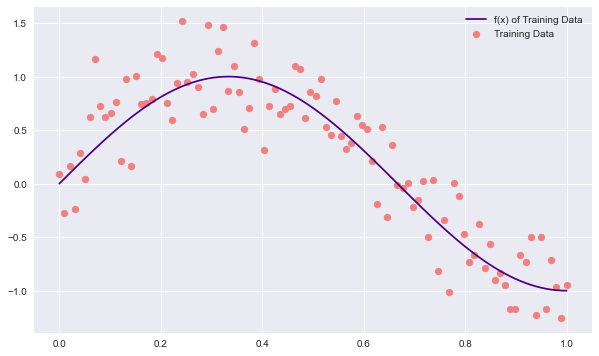

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'indigo', label = 'f(x) of Training Data')
plt.scatter(x,y_noise, facecolors = 'lightcoral', edgecolor = 'lightcoral',
            label = 'Training Data')

plt.legend()
plt.show()

In [19]:
from scipy import linalg

def lwr(x, y, xtest, tau=0.05):
  ypred = np.zeros(len(xtest))

  for i in range(len(xtest)):
    weights = np.array([np.exp(-(x-xtest[i])**2 / (2*tau**2))])
    b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
    A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])

    # inverseA = linalg.inv(A) #internally this is what happening
    # theta = inverseA.dot(b)
    theta = linalg.solve(A, b)
    ypred[i] = theta[0] + theta[1] * xtest[i]
  
  return ypred

In [30]:
xtest = np.array([0.2, 0.4, 0.5, 0.8, 0.9])
tau = 0.08
ypred = lwr(x, y, xtest, tau)
#print(*zip(xtest, ypred))

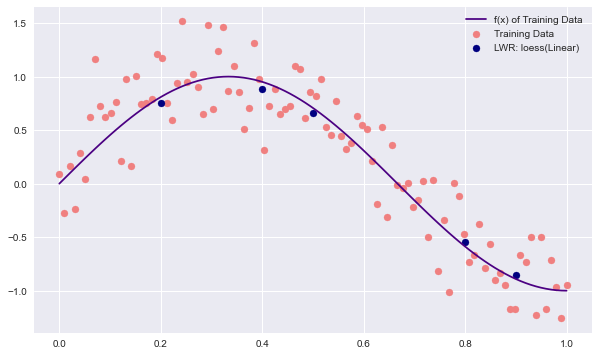

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'indigo', label = 'f(x) of Training Data')
plt.scatter(x,y_noise, facecolors = 'lightcoral', edgecolor = 'lightcoral',
            label = 'Training Data')
plt.scatter(xtest, ypred, color='navy', label='LWR: loess(Linear)')
plt.legend()
plt.show()